In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# APEX Gun 

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
%config InlineBackend.figure_format = 'retina'

In [3]:
from distgen import Generator

G = Generator('distgen_laser.yaml')
G['n_particle'] = 1000
G

<disgten.Generator with input: 
n_particle: 1000
random_type: hammersley
start:
  MTE:
    units: meV
    value: 250
  type: cathode
t_dist:
  avg_t:
    units: ps
    value: 0
  n_sigma_cutoff: 3
  sigma_t:
    units: ps
    value: 8.5
  type: gaussian
total_charge:
  units: pC
  value: 10
xy_dist:
  file: /Users/chrisonian/Code/GitHub/lume-astra/templates/apex_gun/2019_11_04_135614reg_out.txt
  type: file2d

>

In [4]:
G.run()
G.particles

<ParticleGroup with 1000 particles at 0x7ff372e61f90>

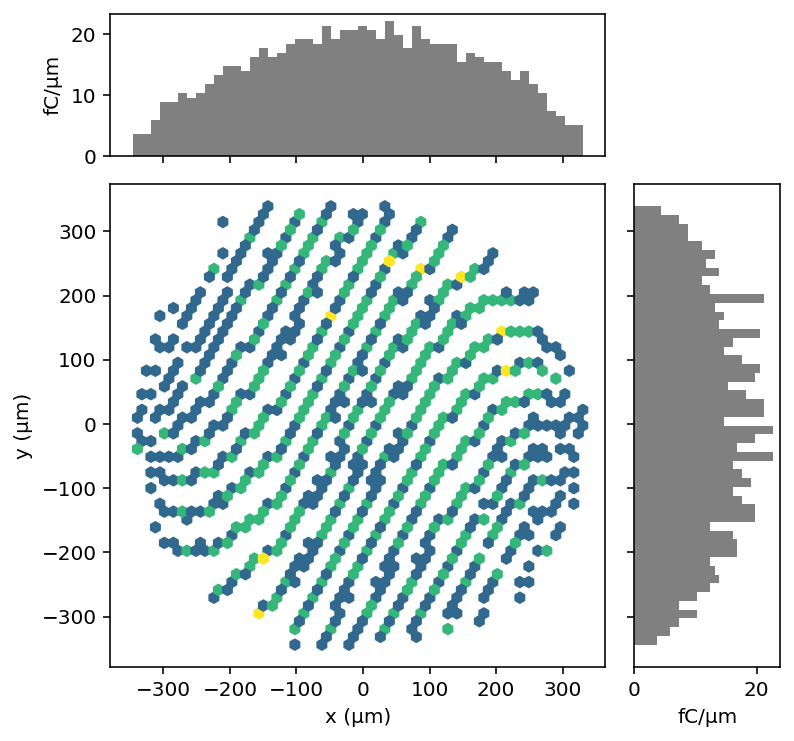

In [5]:
G.particles.plot('x', 'y', bins=50)

In [8]:
from gpt import GPT

In [15]:
GG = GPT('gpt.in', initial_particles=G.particles)
GG.set_variables({'gun_peak_field':20e6,'gun_phase':171.340,'tmax': 4e-7, 'RadiusMax':.015,
                                      'Ntout':100,
                                     'dtmin':0,
                                     'GBacc':8,
                                       'xacc':8,
                                      'space_charge':0
                                     })

{'gun_peak_field': True,
 'gun_phase': True,
 'tmax': True,
 'RadiusMax': True,
 'Ntout': True,
 'dtmin': True,
 'GBacc': True,
 'xacc': True,
 'space_charge': True}

In [16]:
GG.run()

In [18]:
GG.input

{'lines': ['Master_RF=187000000.0;',
  'gun_voltage=300.0;',
  'gun_peak_field=20000000.0;',
  'voltage_scale=1.0;',
  'gun_phase=171.34;',
  'tmax=4e-07;',
  'Ntout=100;',
  'single_particle=0.0;',
  'space_charge=0;',
  'space_charge_type=1.0;',
  'use_gun_peak_field=1.0;',
  'setfile("beam", "/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmps284q4i0/gpt.particles.gdf");',
  'RadiusMax=0.015;',
  'GBacc=8;',
  'xacc=8;',
  'accuracy(GBacc, xacc);',
  'dtmin=0;',
  'dtmax=1e-10;',
  'XGUN=0.0;',
  'YGUN=0.0;',
  'ZGUN=0.0;',
  'if(use_gun_peak_field==1) {',
  'Escale   = gun_peak_field;',
  '} else {',
  'Escale   = gun_voltage / voltage_scale;',
  '}',
  'Map25D_TM("wcs", XGUN,YGUN,ZGUN,  1,0,0, 0,1,0, "/Users/chrisonian/Code/GitHub/lume-gpt/templates/apex_gun/fields/apex_gun.gdf", "R", "Z", "Er", "Ez", "Bphi", Escale, 0, gun_phase*(pi/180), 2*pi*Master_RF);',
  'forwardscatter("wcs", "I", "remove", 0.0);',
  'scatterpipe("wcs","I", -1, 1, RadiusMax) scatter="remove";',
  'Alpha=1

In [8]:
# Turn space charge off
I.total_charge = 0
I.stop = 0.5

In [9]:
I.run()

In [10]:
I.output.keys()

dict_keys(['run_info', 'stats', 'slice_info', 'particles'])

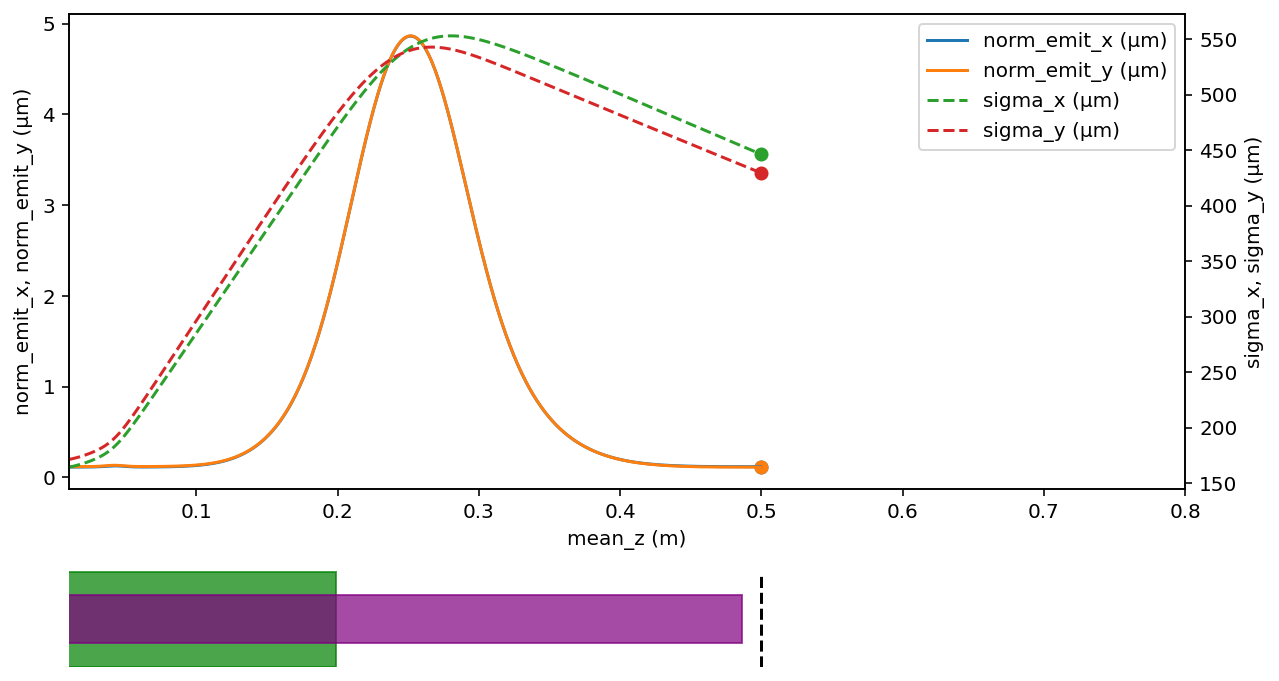

In [12]:
I.plot(y=['norm_emit_x', 'norm_emit_y'], y2=['sigma_x', 'sigma_y'], xlim=(0.01, 0.8), figsize=(10,6))

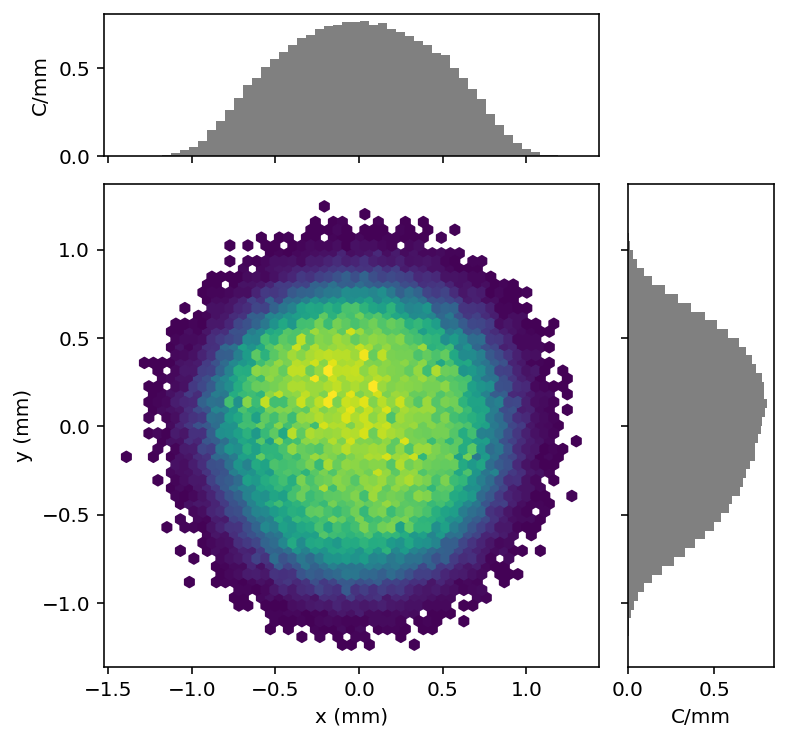

In [13]:
I.particles['final_particles'].plot('x', 'y', bins=50)

In [14]:
I.archive()

'impact_f718655836292d6ebb06860a0323b529.h5'

In [15]:
!rm *h5